# 1201. Ugly Number III

### Difficulty: <font color = orange> Medium </font>

---
An **ugly number** is a positive integer that is divisible by `a`, `b`, or `c`.

Given four integers `n`, `a`, `b`, and `c`, return the `nth` **ugly number**.

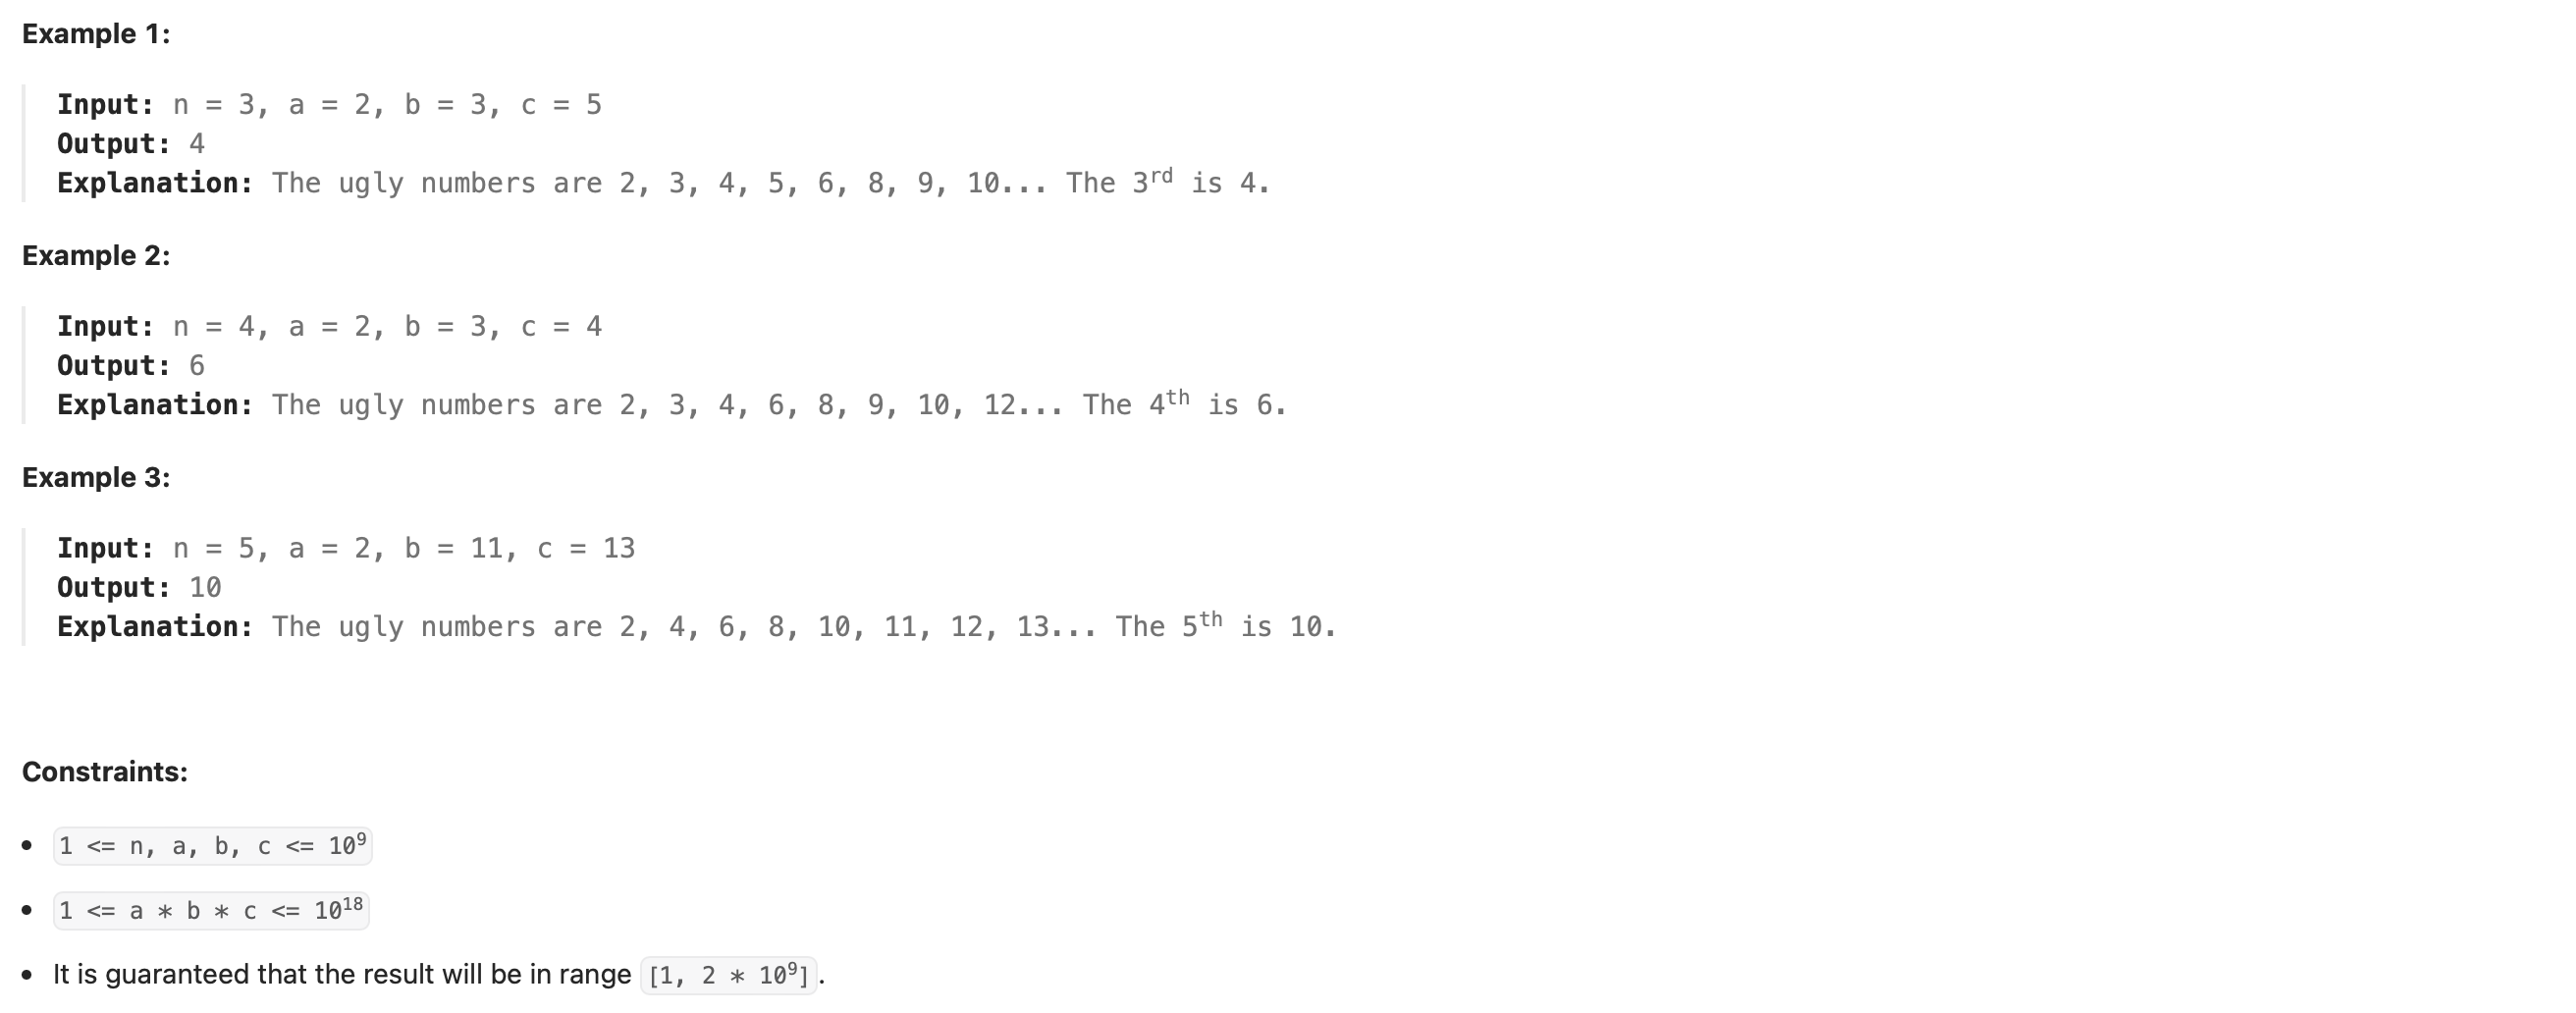

## Approach Overview:

Define the possible range of values the `nth` ugly number can lie in. Using binary search, find the `nth` ugly number in that range.

(`nth` ugly number = the smallest number with exactly `n` ugly numbers less than or equal to it).

## Detailed Explanation:

This one was a real learning experience. I couldn't manage to solve it on my own. I couldn't come up with a way to find the `nth` ugly number but did understand that it must lie within a fixed range.

The solution employed a clever counting technique that I honestly could've never devised on my own.

Essentially for every trial ugly number we pick from the solution range. We calculate the count of ugly numbers less than or equal to it and if:

1) if ugly numbers count >= n, we then narrow search range to look for a smaller trial ugly number (until we find the smallest possible one)

2) if ugly numbers count < n, we then narrow search range to look for a larger trial ugly number (because the current one is too small)

**Key note: An ugly number is defined as a number divisible by either a, b or c.**

So when calculating the count of ugly numbers up to (and including) the **trial ugly number** we run the high risk of overcounting because an ugly number might be divisible by more than just `a` or `b` or `c`.

For example, an ugly number might be divisible by both a and b or divisible by both a and c or divisible by both b and c. And as a result, instead of only being counted only once, it will get counted as an ugly number multiple times. Hence it'll be overcounted.  

To ensure we accurately count the number of unique ugly numbers we employ a counting technique called the **inclusion-exclusion principle**.

In simple words the **inclusion-exclusion principle** is a way to count the total number of items in multiple overlapping groups without counting any item more than once.

**The backbone logic behind it:**

*Start by Counting Each Group:*

- Count how many items are in each group.

*Subtract the Overlaps:*

- Subtract the items that are in the overlaps of any two groups, because they were counted twice in the first step.

*Add Back the Triple Overlaps:*

- Add back the items that are in the overlap of all three groups, because they were subtracted too many times in the previous step.

**Formula:**

For three groups, the total count is:

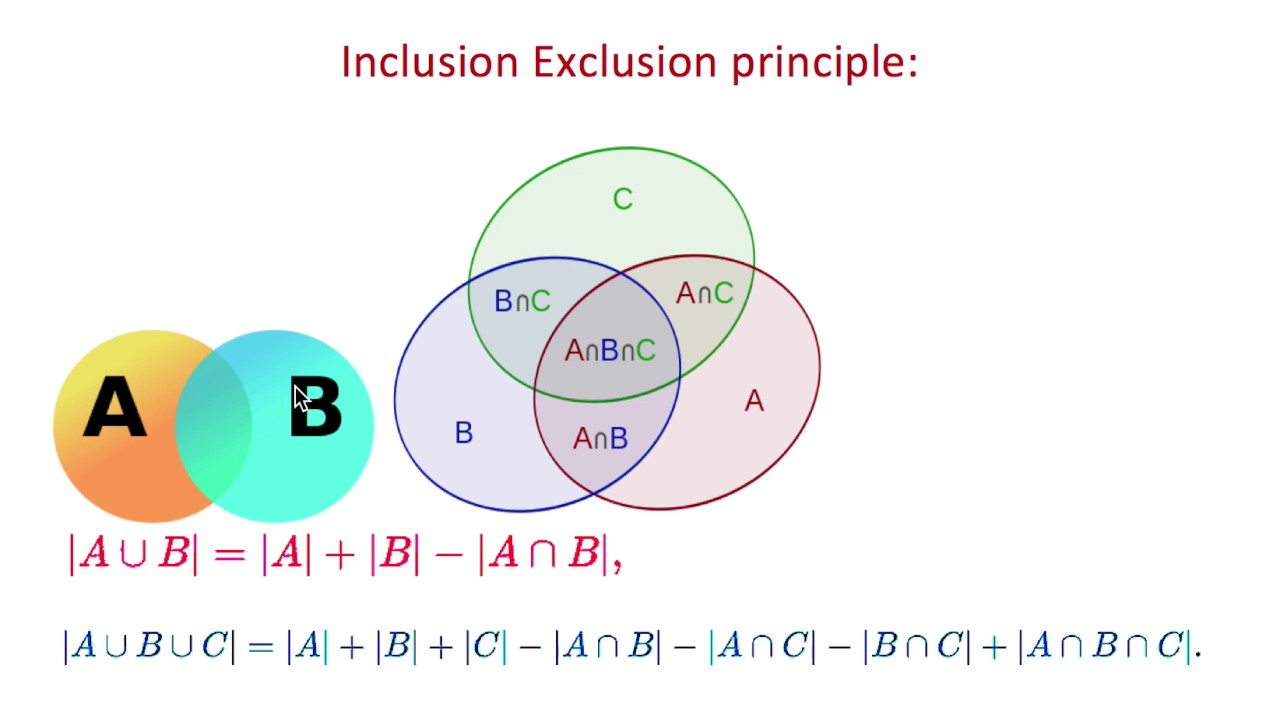

### **For our problem this transforms into:** 

##### **Find the smallest positive integer  such that the number of ugly numbers less than or equal to  is exactly.**

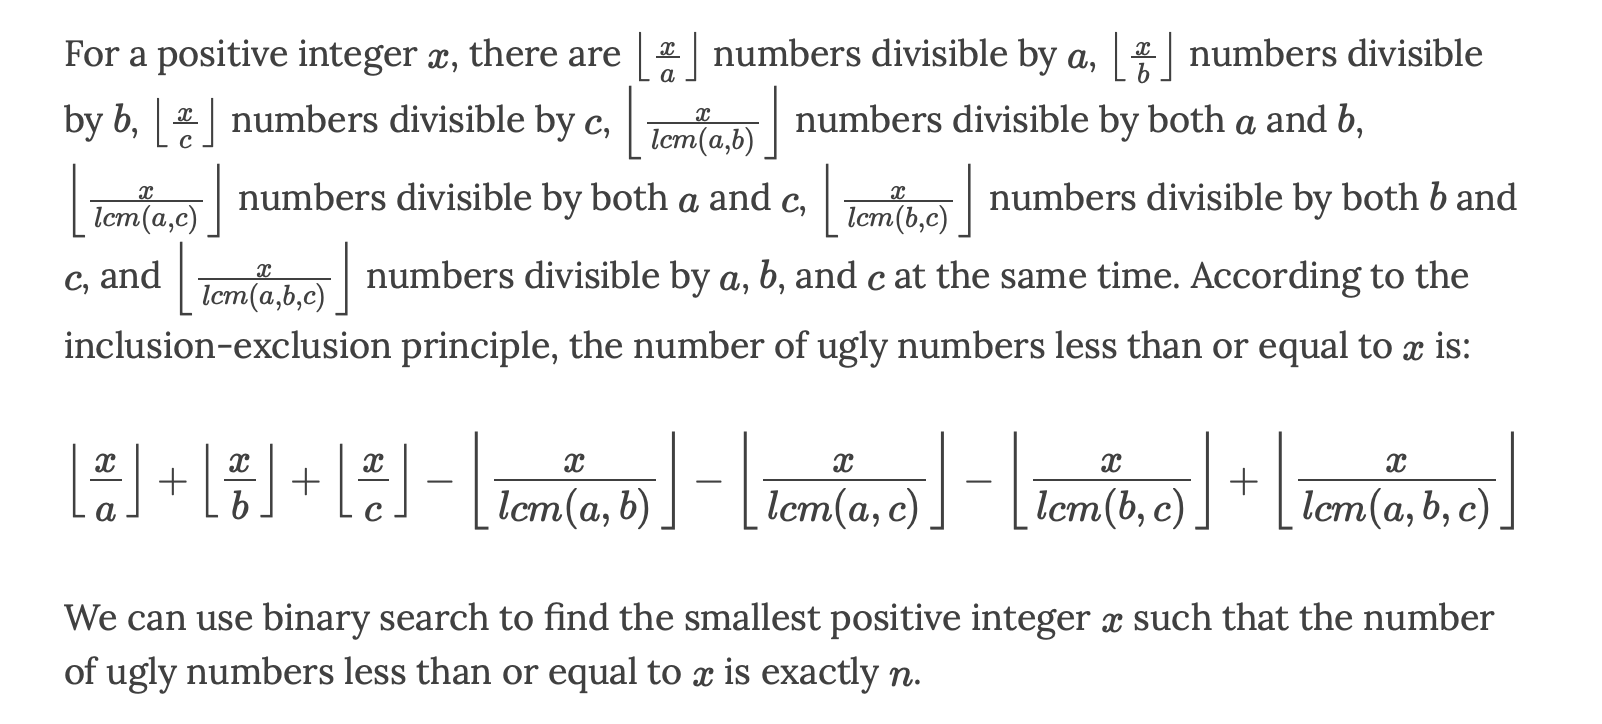

## Solution:

In [ ]:
class Solution:
    def nthUglyNumber(self, n: int, a: int, b: int, c: int) -> int:
        def UglyNumberCount(number):
            # helper function 
            # to calculate and return the count of ugly numbers up to `number`
            
            # lowest common multiple between a & b
            ab = lcm(a,b)
            # lowest common multiple between a & c
            ac = lcm(a,c)
            # lowest common multiple between b & c
            bc = lcm(b,c)
            # lowest common multiple between a, b & c
            abc = lcm(a,bc)

            # count of ugly numbers up to `number` 
            count = (number // a + number // b + number // c - number // ab - number // ac - number // bc + number // abc)

            # return count of ugly numbers up to `number`
            return count

        # initialize lower bound
        left = min(a,b,c)
        # initialize upper bound
        right = n * max(a,b,c)
        
        # loop until left and right pointers meet
        while left < right:

            # calculate the middle value of current range
            mid = left + (right - left) // 2

            # check if count of ugly numbers up to `mid` >= n
            if UglyNumberCount(mid) >= n:

                # narrow search range to find a smaller `ugly number` 
                right = mid

            # count of ugly numbers is too small (its less than n) 
            else:
                # narrow search range to find a bigger `ugly number`
                left = mid + 1

        # return the nth ugly number    
        return left          